<a href="https://colab.research.google.com/github/CUNGVANTHANG/Python/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mã sinh viên: 21020939**

**Họ và tên: Cung Văn Thắng**

**Đề bài: Thực hiện Classification cho CIFAR-10 Dataset sử dụng CNN**

**Phân tích yêu cầu:**

1. Dùng dữ liệu gốc
2. Dùng chuẩn hóa
3. Epochs = 40 cho ra accuracy ~ 0.8

In [ ]:
from google.colab import drive # import thư viện drive từ gói google.colab
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Tiền xử lý dữ liệu (Data pre-processing)

## 1.1. Tải xuống và đọc tập dữ liệu

In [ ]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10) # Tạo ra số giả ngẫu nhiên dựa trên giá trị seed và ở đây seed = 10
(X_train,y_train),(X_test, y_test)=cifar10.load_data() # Tải tập dữ liệu lên 2 mảng train và test
print('Số ảnh dùng để train:',len(X_train))
print('Số ảnh dùng để test :',len(X_test))
print('Kích cỡ ảnh train :',X_train.shape)
print('Kích cỡ train_label :',y_train.shape)
print('Kích cỡ ảnh test :',X_test.shape)
print('Kích cỡ test_label :',y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Số ảnh dùng để train: 50000
Số ảnh dùng để test : 10000
Kích cỡ ảnh train : (50000, 32, 32, 3)
Kích cỡ train_label : (50000, 1)
Kích cỡ ảnh test : (10000, 32, 32, 3)
Kích cỡ test_label : (10000, 1)


In [ ]:
print(X_train[0])
print("Nhìn vào các pixel của bức ảnh -> là một ma trận 3 chiều")

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
Nhìn vào các pixel của bức ảnh -> là một ma trận 3 chiều


In [ ]:
print(y_train.shape)
print(y_train[:5])

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


## 1.2. Hình dung một phần của tập huấn luyện

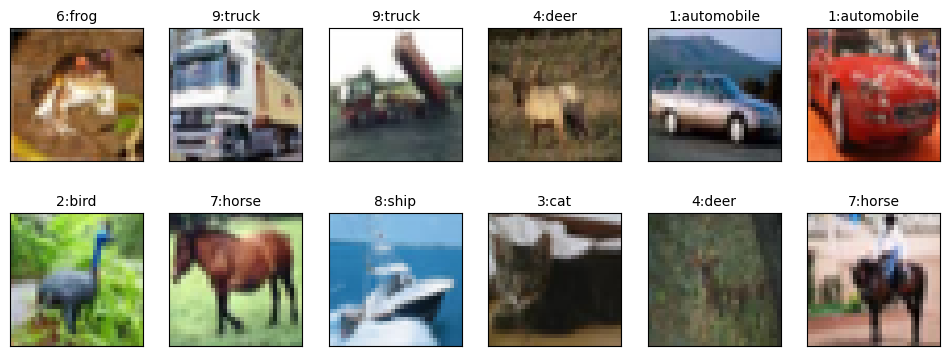

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
# Tạo một từ điển và gán các giá trị từ 1 đến 9 cho các loại ảnh
import matplotlib.pyplot as plt
def showImageandLabel(images,labels,idx,num=10):
    fig = plt.gcf() # Lấy số liệu của 1 hình ảnh và gán cho fig
    fig.set_size_inches(12, 14) # Kiểm soát kích thước hình ảnh
    if num>25: num=25  # Hiển thị lên đến 25
    for i in range(0, num):
        ax=plt.subplot(6,6, 1+i)
        ax.imshow(images[idx],cmap='binary') # Hiển thị dữ liệu dưới dạng hình ảnh, cmap để ánh xạ dữ liệu vô hướng với màu sắc và ở đây là loại binary
        title=str(labels[i][0])+':'+label_dict[labels[i][0]] # Danh mục tương ứng với hình thứ i
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]); # Để đặt các vị trí xtick trên trục x nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy
        ax.set_yticks([])  # Để đặt các vị trí ytick trên trục y nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy
        idx+=1
    plt.savefig('1.png') # Lưu hình ảnh vào 1 file tên 1.png
    plt.show()

# prediction=y_label_train[:12] # Giả sử predict chính là tạp train luôn
# prediction=[i[0] for i in prediction] # Lấy cột đầu tiên thôi
# print("12 ảnh đầu của tập train:" ,prediction)
showImageandLabel(X_train,y_train,0,12) # Bắt đầu từ 0 kết thúc tại 12

## 1.3. Chuẩn hóa hình ảnh(Image normalize)
- Các giá trị pixel có thể nằm trong khoảng từ 0 đến 256. Mỗi số đại diện cho một mã
màu.
- Khi sử dụng hình ảnh như vậy và chuyển qua Mạng nơ ron sâu, việc tính toán các giá
trị số cao có thể trở nên phức tạp hơn.
- Để giảm điều này, chúng ta có thể chuẩn hóa các giá trị trong phạm vi từ 0 đến 1.
Bằng cách này, các con số sẽ nhỏ hơn và việc tính toán trở nên dễ dàng và nhanh
chóng hơn.
- Vì các giá trị pixel nằm trong khoảng từ 0 đến 256, ngoài 0, phạm vi là 255. Vì vậy,
chia tất cả các giá trị cho 255 sẽ chuyển đổi nó thành phạm vi từ 0 đến 1.


In [ ]:
print(X_train[0][0][0]) #（50000，32，32，3）
X_train_normalize = X_train.astype('float32') / 255.0  # Chuẩn hóa dữ liệu X_train về dạng số float 32bit sau khi chia 255 thì dữ liệu đầu vào từ 0.0 đến 1.0
X_test_normalize = X_test.astype('float32') / 255.0
print(X_train_normalize[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


## 1.4. Mã hóa one-hot (One-Hot Encoding)
- Mã hóa **one-hot** là biểu diễn của các biến phân loại dưới dạng vectơ nhị phân. Điều này đầu tiên yêu cầu các giá trị phân loại được ánh xạ thành các giá trị số nguyên. Sau đó, mỗi giá trị số nguyên được biểu diễn dưới dạng vectơ nhị phân có tất cả các giá trị bằng 0 ngoại trừ chỉ số của số nguyên, được đánh dấu bằng 1.
- **One-hot** encoding là một quá trình mà các biến phân loại (label) được chuyển đổi thành một mẫu có thể cung cấp cho các thuật toán ML để thực hiện công việc tốt hơn khi mà dự đoán.
- **API Keras** cung cấp một `to_categorical()` phương thức có thể được sử dụng để mã hóa một lần dữ liệu số nguyên . Nếu dữ liệu số nguyên đại diện cho tất cả các giá trị có thể có của các lớp, thì `to_categorical()` phương thức có thể được sử dụng trực tiếp; nếu không, số lớp có thể được truyền cho phương thức dưới dạng num_classes tham số.

In [ ]:
from keras.utils import to_categorical
y_train_OneHot = to_categorical(y_train)   # Hàm to_categorical giúp chuyển đổi vector thành một ma trận nhị phân có số hàng bằng độ dài của vector đầu vào và số cột bằng số lớp
y_test_OneHot = to_categorical(y_test)
print(y_train_OneHot.shape) # Kích thước của ma trận nhị phân cho tập dữ liệu huấn luyện
print(y_train_OneHot[:5]) # In ra năm mẫu đầu tiên sau khi mã hóa one-hot

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# 2. Convolutional layer network
## 2.1. Xây dựng mô hình

In [ ]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
# Tải tập dữ liệu
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print("train data:",'images:',X_train.shape,
      " labels:",y_train.shape)
print("test  data:",'images:',X_test.shape ,
      " labels:",y_test.shape)
# Chuẩn hóa
X_train_normalize = X_train.astype('float32') / 255.0
X_test_normalize = X_test.astype('float32') / 255.0
# One-Hot Encoding
from keras.utils import to_categorical
y_train_OneHot = to_categorical(y_train) # Hàm to_categorical giúp chuyển đổi vector thành một ma trận nhị phân có số hàng bằng độ dài của vector đầu vào và số cột bằng số lớp
y_test_OneHot = to_categorical(y_test)
y_test.shape

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


(10000, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

model=Sequential()

# Thêm các lớp Convolutional và lớp MaxPooling:
# - Lớp Convolutional (Conv2D) giúp trích xuất đặc trưng từ hình ảnh.
# - Lớp MaxPooling giúp giảm kích thước của đặc trưng.

model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3),  activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Xây dựng lớp phẳng (Flatten) và lớp ẩn (Dense):
# - Lớp phẳng (Flatten) biến đổi dữ liệu từ dạng ma trận thành dạng vector.
# - Lớp ẩn (Dense) là các lớp nơ-ron ẩn được sử dụng để xử lý đặc trưng và học từ dữ liệu.

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
print(model.summary()) # In tóm tắt mô hình

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [ ]:
# Số GPU được sử dụng trong cài đặt đào tạo trước
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # Cài đặt biến môi trường để chỉ định sử dụng một GPU cụ thể
os.environ["CUDA_VISIBLE_DEVICES"]="0"         # Sẽ chỉ sử dụng thiết bị GPU đầu tiên

## 2.2. Quy trình đào tạo

In [ ]:
# loss='categorical_crossentropy': Chọn hàm mất mát là categorical cross-entropy, phù hợp cho bài toán phân loại nhiều lớp.
# optimizer='adam': Sử dụng thuật toán tối ưu hóa Adam để cập nhật trọng số mô hình trong quá trình huấn luyện.
# metrics=['accuracy']: Đánh giá hiệu suất của mô hình dựa trên độ chính xác (accuracy).

# Tiến hành huấn luyện mô hình với dữ liệu chuẩn hóa X_train_normalize và nhãn đã mã hóa one-hot y_train_OneHot:
# validation_split=0.2: Sử dụng 20% của dữ liệu huấn luyện để tạo tập kiểm tra (validation set) để đánh giá mô hình trong quá trình huấn luyện.
# epochs=40: Chọn số lượng vòng lặp (epoch) là 40, tức là mô hình sẽ được huấn luyện qua toàn bộ dữ liệu 40 lần.
# batch_size=300: Chia dữ liệu thành các mini-batch có kích thước 300 mẫu để cập nhật trọng số mô hình.
# verbose=1: Hiển thị thông tin chi tiết về quá trình huấn luyện, bao gồm độ chính xác và hàm mất mát sau mỗi epoch.

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
train_history=model.fit(X_train_normalize, y_train_OneHot,
                        validation_split=0.2,
                        epochs=40, batch_size=300, verbose=1)

Epoch 1/40
134/134 [==============================] - 21s 46ms/step - loss: 1.9133 - accuracy: 0.2794 - val_loss: 1.7527 - val_accuracy: 0.3504
Epoch 2/40
134/134 [==============================] - 5s 40ms/step - loss: 1.4997 - accuracy: 0.4451 - val_loss: 1.5610 - val_accuracy: 0.4361
Epoch 3/40
134/134 [==============================] - 5s 39ms/step - loss: 1.3121 - accuracy: 0.5200 - val_loss: 1.2546 - val_accuracy: 0.5559
Epoch 4/40
134/134 [==============================] - 5s 39ms/step - loss: 1.1505 - accuracy: 0.5846 - val_loss: 1.0654 - val_accuracy: 0.6216
Epoch 5/40
134/134 [==============================] - 5s 41ms/step - loss: 1.0392 - accuracy: 0.6270 - val_loss: 0.9501 - val_accuracy: 0.6703
Epoch 6/40
134/134 [==============================] - 5s 40ms/step - loss: 0.9390 - accuracy: 0.6654 - val_loss: 0.9128 - val_accuracy: 0.6841
Epoch 7/40
134/134 [==============================] - 5s 41ms/step - loss: 0.8714 - accuracy: 0.6915 - val_loss: 0.9419 - val_accuracy: 0.670

In [ ]:
print(train_history) # In object lịch sử đào tạo
print(train_history.epoch) # In list epoch
print(train_history.history) # In lịch sử dào tạo
print(train_history.model) # In thông tin model

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
{'loss': [1.9133050441741943, 1.499679446220398, 1.3121188879013062, 1.1505011320114136, 1.0391671657562256, 0.9389854669570923, 0.8714398145675659, 0.819972574710846, 0.7495651245117188, 0.6954234838485718, 0.6546623706817627, 0.6157615780830383, 0.5765238404273987, 0.5408643484115601, 0.5069654583930969, 0.47474536299705505, 0.4568804204463959, 0.42707401514053345, 0.39741814136505127, 0.3755064010620117, 0.34898850321769714, 0.3377391993999481, 0.31769633293151855, 0.3073301613330841, 0.29545748233795166, 0.28391942381858826, 0.2670521140098572, 0.24644555151462555, 0.24839040637016296, 0.23299731314182281, 0.22081242501735687, 0.2153371274471283, 0.2134651392698288, 0.2037179321050644, 0.19972670078277588, 0.19273076951503754, 0.18725861608982086, 0.1868099421262741, 0.17352177202701569, 0.1733073592185974], 'accuracy': [0.2794499993

In [ ]:
# Sử dụng Pickle để lưu các đối tượng
import pickle
filename = '/content/drive/MyDrive/Computer_Vision/train_history.pickle' # Đặt tên tệp tin và đường dẫn đến nơi bạn muốn lưu tệp tin này
pickle.dump(train_history, open(filename, 'wb')) # Sử dụng pickle.dump để lưu đối tượng train_history vào tệp tin được mở ở chế độ ghi (wb: write binary)

In [ ]:
loaded_model = pickle.load(open(filename, 'rb')) # Đường dẫn đến tệp tin chứa đối tượng cần nạp.
print(loaded_model) # Sử dụng pickle.load để nạp (load) đối tượng từ tệp tin đã được mở ở chế độ đọc nhị phân (rb: read binary).

## 2.3. Hình dung quá trình đào tạo

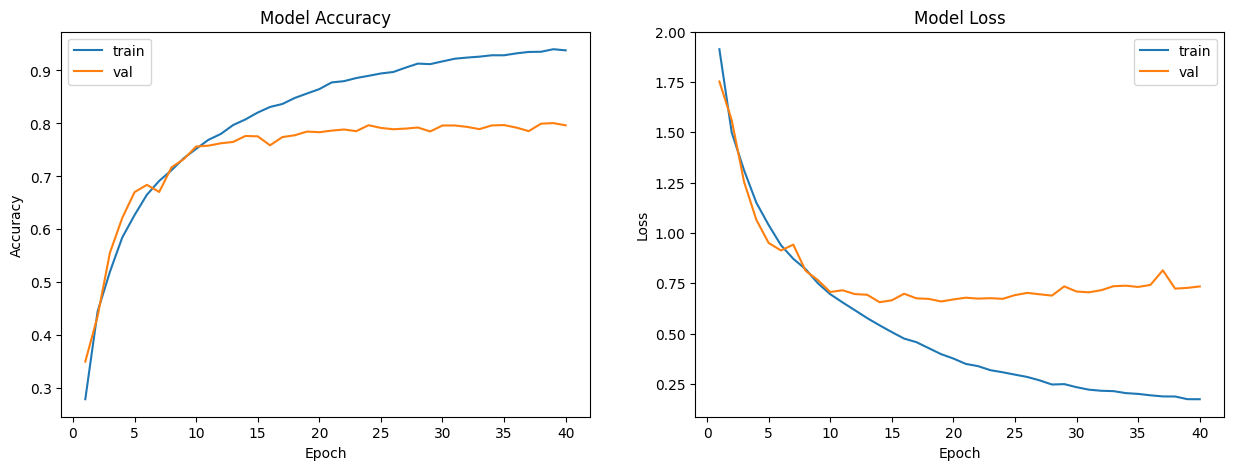

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Vẽ đồ thị độ chính xác
    axs[0].plot(range(1, len(model_history.history['accuracy'])+1),model_history.history['accuracy']) # Vẽ đồ thị accuracy
    axs[0].plot(range(1, len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy']) # Vẽ đồ thị val_accuracy
    axs[0].set_title('Model Accuracy') # Đặt tiêu đề đồ thị
    axs[0].set_ylabel('Accuracy') # Đặt tiêu đề trục y
    axs[0].set_xlabel('Epoch') # Đặt tiêu đề trục x
    axs[0].set_xticks(np.arange(0, len(model_history.history['accuracy']) + 1, 5)) # Lấy vị trí và nhãn của trục x
    axs[0].legend(['train', 'val'], loc='best') # Hiển thị ghi chú trong đồ thị
    # Vẽ đồ thị độ tổn thất
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss']) # Vẽ đồ thị loss
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss']) # Vẽ đồ thị val_loss
    axs[1].set_title('Model Loss') # Đặt tiêu đề đồ thị
    axs[1].set_ylabel('Loss') # Đặt tiêu đề trục y
    axs[1].set_xlabel('Epoch') # Đặt tiêu đề trục x
    axs[1].set_xticks(np.arange(0, len(model_history.history['loss']) + 1, 5)) # Lấy vị trí và nhãn của trục x
    axs[1].legend(['train', 'val'], loc='best') # Hiển thị ghi chú trong đồ thị
    plt.show() # Xuất đồ thị
plot_model_history(loaded_model)

## 2.4. Đánh giá mô hình

In [ ]:
scores = model.evaluate(X_test_normalize,
                        y_test_OneHot,verbose=0)
print(scores)
print(scores[0])

[0.812751293182373, 0.781499981880188]
0.812751293182373


## 2.5. Kết quả dự đoán

In [ ]:
# Lấy 10 đầu tiên làm ví dụ, các lớp dự đoán (danh mục dự đoán, nghĩa là giá trị lớn nhất của đầu ra softmax)
pre=model.predict(X_test_normalize) # Phương thức này giúp ta dự đoán nhãn của các giá trị dữ liệu và trả về các nhãn của dữ liệu dựa trên dữ liệu đã học
prediction=np.argmax(pre,axis=1) # Trả về các chỉ số của phần tử lớn nhất theo một trục cụ thể ở đây axis=1 là theo trục dọc
print(prediction[:10])

313/313 [==============================] - 1s 2ms/step
[3 8 8 0 6 6 3 6 5 1]


In [ ]:
# Hình dung một số kết quả dự báo
import matplotlib.pyplot as plt
def showImageandLabelPrediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf() # Tạo một hình mới với kích thước cài đặt sẵn
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(6,6, 1+i)
        ax.imshow(images[idx],cmap='binary')

        title=str(labels[i][0])+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

# Hàm show_Predicted_Probability dùng để hiển thị xác suất dự báo của mô hình
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2)) # Tạo một hình mới hoặc kích hoạt một hình hiện có với kích thước cài sẵn
    plt.imshow(np.reshape(X_test[i],(32, 32,3))) # Định dạng lại dữ liệu hình ảnh với kích thước bằng reshape sau đó hiển thị dữ liệu dữ liệu dưới dạng hình ảnh
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

313/313 [==============================] - 1s 4ms/step
label: cat predict: cat


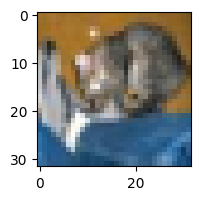

airplane Probability:0.000000019
automobile Probability:0.000000957
bird Probability:0.000000192
cat Probability:0.954994440
deer Probability:0.000001924
dog Probability:0.044528630
frog Probability:0.000453248
horse Probability:0.000001396
ship Probability:0.000007951
truck Probability:0.000011120
-----------------------------------------
label: airplane predict: airplane


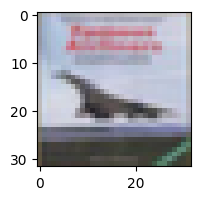

airplane Probability:0.933544517
automobile Probability:0.001116464
bird Probability:0.052647911
cat Probability:0.000348222
deer Probability:0.002520499
dog Probability:0.000023343
frog Probability:0.000000517
horse Probability:0.000027045
ship Probability:0.009728725
truck Probability:0.000042779


In [ ]:
Predicted_Probability = model.predict(X_test_normalize) # Phương thức này giúp ta dự đoán nhãn của các giá trị dữ liệu và trả về các nhãn của dữ liệu dựa trên dữ liệu đã học
# Định nghĩa một từ điển label_dict để ánh xạ từ số lớp sang tên lớp tương ứng.
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
# Hiển thị kết quả dự báo cho một vài ví dụ.
show_Predicted_Probability(y_test,prediction,X_test,Predicted_Probability,0)
print("-----------------------------------------")
show_Predicted_Probability(y_test,prediction,X_test,Predicted_Probability,3)

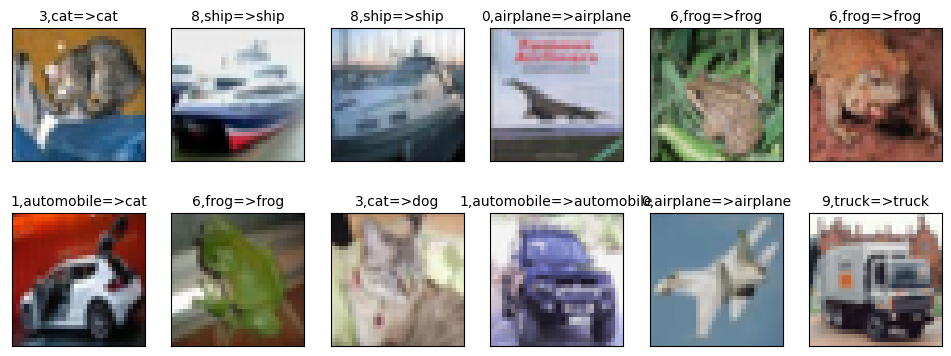

In [ ]:
showImageandLabelPrediction(X_test,y_test,prediction,0, 12) # Kết quả sẽ được hiển thị trên biểu đồ, cho phép bạn kiểm tra cách mô hình dự đoán các hình ảnh trong dữ liệu kiểm tra.

## 2.7. Hiển thị ma trận nhầm lẫn

In [ ]:
print("prediction.shape=", str(prediction.shape), ", y_label_test.shape=",str(y_test.shape)) # In thông tin về kích thước của mảng kết quả dự báo và mảng nhãn gốc.
print(y_test) # In mảng nhãn gốc (y_test).
print(y_test.reshape(-1)) # Chuyển đổi sang mảng 1D

prediction.shape= (10000,) , y_label_test.shape= (10000, 1)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[3 8 8 ... 5 1 7]


In [ ]:
import pandas as pd
print(label_dict)
pd.crosstab(y_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

# Ma trận hỗn loạn
# crosstab sẽ tạo ra một bảng tính toán đơn giản ở đây các hàng sẽ là danh sách các nhãn, các cột là danh sách các dự đoán nhãn
#.......row , colummn

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,776,4,37,37,26,5,12,6,64,33
1,10,869,5,10,4,11,17,3,20,51
2,47,0,634,91,94,48,61,15,8,2
3,9,2,38,671,47,150,60,15,3,5
4,3,1,25,82,799,28,36,22,4,0
5,3,1,27,186,46,692,20,23,2,0
6,5,0,22,51,22,14,880,1,3,2
7,6,0,16,65,86,47,5,771,0,4
8,27,5,17,28,12,8,10,2,870,21


frop dự đoán chính xác nhất 880/1000 cho biết ít bị nhầm

bird dự đoán ít chính xác nhất 634/1000 cho biết nhiều khả năng bị nhầm.

dog dự đoán thành mèo 150/1000, mèo dự đoán thành chó 186/1000. Kết luận chó và mèo dễ nhầm lẫn

Động vật: 2, 3, 4, 5, 6, 7

Loại xe: 0, 1, 8, 9

In [ ]:
path='/content/drive/MyDrive/Computer_Vision/finalmodel.h5'
model.save(path) # Lưu mô hình

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
